In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('tennis.csv')
data


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
day         14 non-null object
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
wind        14 non-null object
play        14 non-null object
dtypes: object(6)
memory usage: 752.0+ bytes


In [5]:
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [6]:
#data.drop(['day'], inplace = True, axis = 1)
#dummies = data["Team"].str.get_dummies(" ") 
#outlook = pd.str.get_dummies(data['outlook'], drop_first=True)
outlook=data["outlook"].str.get_dummies(" ")
temp = data["temp"].str.get_dummies(" ")
humidity = data["humidity"].str.get_dummies(" ")
#windy = data["windy"].str.get_dummies(" ")
play = data["play"].str.get_dummies(" ")
#humidity = pd.get_dummies(data['humidity'], drop_first=True)
windy = pd.get_dummies(data['wind'], drop_first=True)
#play = pd.get_dummies(data['play'], drop_first=True)
humidity
play

,No,Yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1


In [7]:
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [8]:
data.drop(['outlook', 'temp', 'humidity', 'wind', 'play'], axis = 1, inplace = True)

In [9]:
data = pd.concat([outlook, temp, humidity, windy, play], axis = 1)

In [11]:
data.head()
data


,Overcast,Rain,Sunny,Cool,Hot,Mild,High,Normal,Weak,No,Yes
0,0,0,1,0,1,0,1,0,1,1,0
1,0,0,1,0,1,0,1,0,0,1,0
2,1,0,0,0,1,0,1,0,1,0,1
3,0,1,0,0,0,1,1,0,1,0,1
4,0,1,0,1,0,0,0,1,1,0,1
5,0,1,0,1,0,0,0,1,0,1,0
6,1,0,0,1,0,0,0,1,0,0,1
7,0,0,1,0,0,1,1,0,1,1,0
8,0,0,1,1,0,0,0,1,1,0,1
9,0,1,0,0,0,1,0,1,1,0,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop(['Yes','No'], axis=1)
y = data['No']
X

,Overcast,Rain,Sunny,Cool,Hot,Mild,High,Normal,Weak
0,0,0,1,0,1,0,1,0,1
1,0,0,1,0,1,0,1,0,0
2,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,1,0,1
4,0,1,0,1,0,0,0,1,1
5,0,1,0,1,0,0,0,1,0
6,1,0,0,1,0,0,0,1,0
7,0,0,1,0,0,1,1,0,1
8,0,0,1,1,0,0,0,1,1
9,0,1,0,0,0,1,0,1,1


In [12]:
X.head()

,Overcast,Rain,Sunny,Cool,Hot,Mild,High,Normal,Weak
0,0,0,1,0,1,0,1,0,1
1,0,0,1,0,1,0,1,0,0
2,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,1,0,1
4,0,1,0,1,0,0,0,1,1


In [16]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: No, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc2 = DecisionTreeClassifier()

In [27]:
dtc.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
preds = dtc.predict(X_test)
print(X_train)
print(X_test)

    Overcast  Rain  Sunny  Cool  Hot  Mild  High  Normal  Weak
7          0     0      1     0    0     1     1       0     1
1          0     0      1     0    1     0     1       0     0
11         1     0      0     0    0     1     1       0     0
12         1     0      0     0    1     0     0       1     1
13         0     1      0     0    0     1     1       0     0
10         0     0      1     0    0     1     0       1     0
9          0     1      0     0    0     1     0       1     1
6          1     0      0     1    0     0     0       1     0
3          0     1      0     0    0     1     1       0     1
   Overcast  Rain  Sunny  Cool  Hot  Mild  High  Normal  Weak
0         0     0      1     0    1     0     1       0     1
5         0     1      0     1    0     0     0       1     0
8         0     0      1     1    0     0     0       1     1
4         0     1      0     1    0     0     0       1     1
2         1     0      0     0    1     0     1       0     

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      0.50      0.67         2

avg / total       0.85      0.80      0.78         5

[[3 0]
 [1 1]]


In [24]:
print(data)

    Overcast  Rain  Sunny  Cool  Hot  Mild  High  Normal  Weak  No  Yes
0          0     0      1     0    1     0     1       0     1   1    0
1          0     0      1     0    1     0     1       0     0   1    0
2          1     0      0     0    1     0     1       0     1   0    1
3          0     1      0     0    0     1     1       0     1   0    1
4          0     1      0     1    0     0     0       1     1   0    1
5          0     1      0     1    0     0     0       1     0   1    0
6          1     0      0     1    0     0     0       1     0   0    1
7          0     0      1     0    0     1     1       0     1   1    0
8          0     0      1     1    0     0     0       1     1   0    1
9          0     1      0     0    0     1     0       1     1   0    1
10         0     0      1     0    0     1     0       1     0   0    1
11         1     0      0     0    0     1     1       0     0   0    1
12         1     0      0     0    1     0     0       1     1  

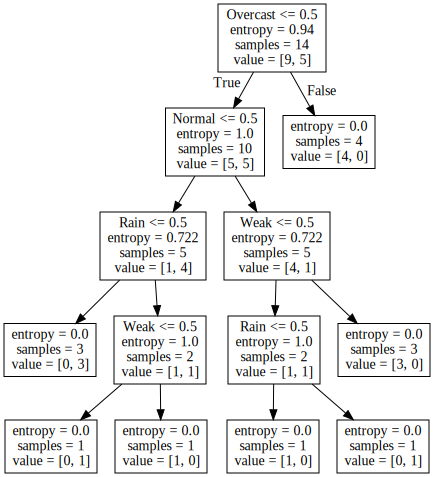

In [20]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dtc, out_file=None, feature_names=X.columns))

In [22]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns[0:])
features

['Overcast', 'Rain', 'Sunny', 'Cool', 'Hot', 'Mild', 'High', 'Normal', 'Weak']

In [23]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

FileNotFoundError: [WinError 2] "dot" not found in path.